In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('startup_funding.csv')


In [5]:
data.CityLocation=='Bangalore'

0        True
1       False
2       False
3       False
4       False
        ...  
2367    False
2368    False
2369    False
2370    False
2371    False
Name: CityLocation, Length: 2372, dtype: bool

   ## Number of funding per year
    

In [ ]:
data.iloc[2357,1]='22/01/2015'

In [7]:
x=pd.DatetimeIndex(data['Date']).year

C:\Users\mdrid\AppData\Local\Temp\ipykernel_1424\1956324986.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  x=pd.DatetimeIndex(data['Date']).year


In [8]:
n=np.array(x.unique())

In [9]:
n

array([2017, 2016, 2015], dtype=int64)

In [10]:
y=[]
y.append(data[x==2015].SNo.count())
y.append(data[x==2016].SNo.count())
y.append(data[x==2017].SNo.count())

In [11]:
y=np.array(y)

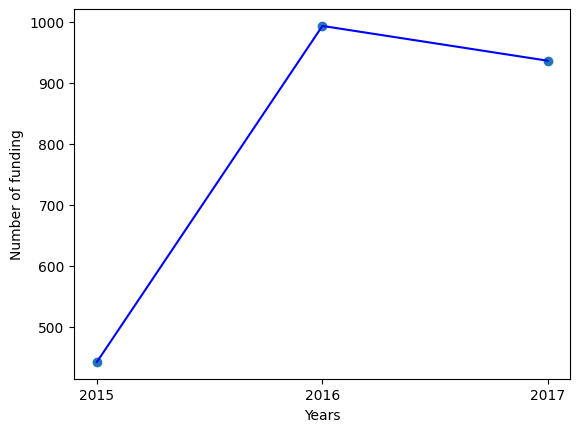

In [12]:
plt.plot(n,y,'b',label='No. of fund')
plt.scatter(n,y)
plt.xlabel("Years")
plt.ylabel("Number of funding")
# plt.legend()
plt.xticks([2015,2016,2017])
plt.show()

# High fund cities in India

In [42]:
lwp=data.copy()

In [43]:
lwp.dropna(inplace=True,subset=['CityLocation'])#subset used to drop based on column

In [44]:
lwp.reset_index(drop=True,inplace=True)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2188,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"3,500,000",Series A
2189,2197,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN
2190,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"400,000",NaN
2191,2199,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,"500,000",NaN


In [58]:
def cit(city):
    x=city.split('/')[0].strip()
    return x
#     return city.split('/')[0].strip

In [40]:
lwp['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
lwp['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
lwp['CityLocation'].replace("SFO / Bangalor", "Bangalore", inplace = True)
lwp['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)

In [60]:
lwp['CityLocation']=lwp['CityLocation'].apply(cit)

In [64]:
lwp['CityLocation'].unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'bangalore', 'Trivandrum',
       'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Indore', 'Singapore', 'Goa', 'Agra', 'Hubli', 'Delhi', 'Kerala',
       'Kozhikode', 'US', 'Coimbatore', 'Siliguri', 'USA', 'Lucknow',
       'Kanpur', 'SFO', 'London', 'Seattle', 'Varanasi', 'Bhopal',
       'Jodhpur', 'Boston', 'Belgaum', 'New York', 'Nagpur', 'India',
       'Udaipur', 'Dallas'], dtype=object)

In [69]:
high=lwp[(lwp.CityLocation=='Bangalore')|(lwp.CityLocation=='Noida')|(lwp.CityLocation=='Gurgaon')|(lwp.CityLocation=='Mumbai')|(lwp.CityLocation=='New Delhi')]

In [80]:
x=high.CityLocation.value_counts()

In [86]:
x_C=x.index
y_c=x.values

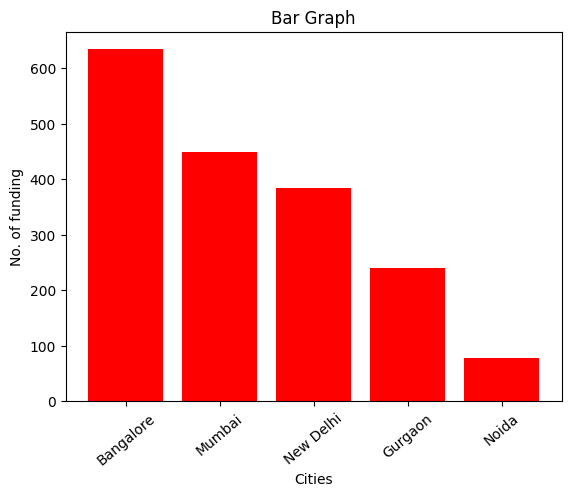

In [92]:
plt.bar(x_C,y_c,width=0.8,color=['Red'])
plt.xticks(rotation=40)
plt.title("Bar Graph")
plt.xlabel("Cities")
plt.ylabel('No. of funding')
plt.show()


# Investment type Pie chart

In [96]:
data.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [98]:
new_data=data.copy()

In [100]:
new_data.dropna(inplace=True,subset=['InvestmentType'])

In [102]:
new_data['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
new_data['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
new_data['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)

In [136]:
x=new_data.InvestmentType.value_counts()
labels=np.array(x.index)
labels[1],labels[2]=labels[2],labels[1]

In [137]:
d

array([1301,    1,    2, 1067], dtype=int64)

In [138]:
x.values

array([1301, 1067,    2,    1], dtype=int64)

In [139]:
d=np.array(x.values)
d[1],d[2]=d[2],d[1]

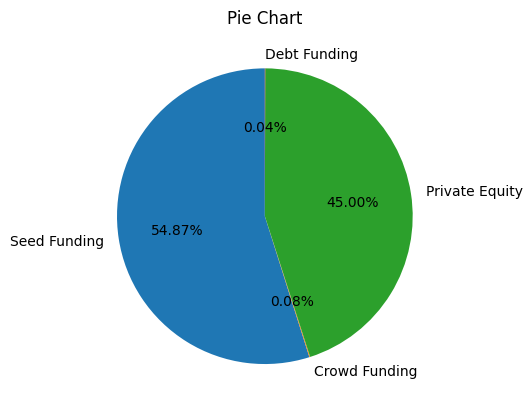

In [150]:
plt.pie(d,labels=labels,autopct="%.2f%%",startangle=90,explode=[0,0,0,0])
plt.title("Pie Chart")
plt.show()